# Seismic Refraction

### Introduction

Seismic refraction is a method utilizing first arrival traveltime measurements made from a linear array of sensors. This method makes use of the fact that when downward propagating seismic waves interact with deeper and faster layers head waves develop, which travel horizontally along the top of the faster surface. Along a given array profile multiple headwave arrivals can occur and be measured. This method has been applied at scales from 1000 km e.g. the Soviet “peaceful nuclear weapons”program imaging lithospheric scale structure to arrays of 30 m to investigate shallow soil and rock characteristics. There are numerous engineering, resource exploration and environmental applications.

### Objective 
In this exercise, we will investigate the different seismic refraction record sections from the experiment.

### Instructions on how to complete this notebook
Use the code provided in this Jupyter Notebook to analyze the provided questions in each part of the assignment, and then answer the questions to complete the homework. Submit your completed notebook either in a *.pdf or *.ipynb format. Write your answers either embedded as Markdown inside the notebook, or attached in a separate *.doc or *.pdf document.

### Due Date
Please submit your homework to natelindsey@berkeley.edu before Tuesday March 19, 2019 at 11:59 pm.

In [153]:
#Initial Setup and Subroutine Definitions
import numpy as np
import matplotlib
import matplotlib.pyplot as plt


### Exercise
Several years ago a geotechnical engineering consulting company carried out a seismic refraction experiment over a graded building pad to investigate the subsurface velocity structure for forensics of the grading work. Figure 1 illustrates the site. The 24 channel seismic system had sensors deployed at even 5 ft intervals. The seisemic source consisted of repeated 20lb hammer blows (3x) on an aluminum striking plate. The team could move the source position around to generate different record sections. Figure 2 shows one of the 24-channel record sections, which contains data from zero time to 0.160 seconds, by way of an example. 

##### Figure 1. Photograph and topography map of the site. The photograph is view east, and the topographic map is oriented with north at the top of the page.

<img src='fig1a.png'>
<img src='fig1b.png'>

##### Figure 2. An example survey record section from one shot. There is a very clear refracted arrival beyond geophone 8. Later phases are secondary P-waves and surface waves.

<img src='fig2.jpg'>


##### Figure 3 Seismic record section for source position located 5 ft south of the array. This figure limits the time axis from zero to 0.06 seconds for the purposes of your analysis.

<img src='fig3.jpg'>

##### Figure 4 Seismic record section for source position located 5 ft north of the array.
<img src='fig4.jpg'>

##### Figure 5 Seismic record section for source position located between geophones 12 and 13 
<img src='fig5.jpg'>

#### Question 1

For each of the record sections sketch in a zero time line, and identify the shot location using a filled circle. The figures are in the current directory (labeled fig3.jpg, fig4.jpg, fig5.jpg). Please complete this question digitally by annotating the image, or print the image and use a pen/pencil.



#### Question 2
For each of the record sections use a straight edge ruler to identify were changes in slope occur, and to estimate the apparent velocity of interpreted layers. Tabulate your results for layers 1 and 2. Are their any deviations from the assumption of a straight line fit to the refracted arrivals?

#### Answer

#### Question 3
For the two off end shots (Figures 3 and 4) determine a solution for a single dipping layer problem. Figure 6 gives the geometry and equations for the two-layer problem.

Note: $T$ are the intercept times. $i$ are the angle of incidence, $\alpha$ is the dip of the layer, and $V_0$, $V_{1d}$, $V_{1u}$, and $V_1$ are the velocities of the upper layer (average from all three profiles), the down dip apparent velocity of the deeper layer, the up dip apparent velocity of the deeper layer, and the actual velocity of the deeper layer. The down dip apparent velocity, $V_{1d}$, is less than the up dip apparent velocity of the refractor.

<img src='fig6.jpg'>

#### Answer:



#### Question 4
For the two off-end shots (Figures 3 and 4) make individual phase arrival picks and tabulate them. Use the code provided to perform inversions for the plane-layered velocity model considering both one and two dipping layers. Test the uncertainty in the model parameters based on your assessment of uncertainties in the traveltime measurements.


In [322]:
def seisrefract(x,t,fr,w,c):
    '''
    Program to compute model velocities from array geometry traveltime picks.
    
    Inputs:
      x  : distance vector in feet [np.array]
      t  : measured arrival time picks in seconds [np.array]
      fr : 1=forward; 2=reverse designation of line [int]
      w  : velocity model layer designation [np.array] 
                1 = velocity1 in the velocity model, 2 = velocity2, etc.
                0 = not used
      c  : color of line to plot [str]
      
    Outputs:
      t01, p1, tt1
      
    '''
    
    # set some initial startup variables
    numline=max(w);
    zero=np.where(w==0)[0];
    zflag=len(zero);
    t01=[];
    p1 =[];

    # for-loop over each velocity in the model
    for J in np.arange(1,numline+1,1):
        
        # Find Values to use in regressions
        k=np.where(w==J)[0];
        tmp=np.ones(size(k));
        X=np.column_stack([tmp.T, x[k].T]);

        # Least-squares solution because matrix is non-square
        a=np.linalg.lstsq(X, t[k].T)[0]
        t01.append(a[0])
        p1.append(a[1])
        tt1=a[0]+a[1]*x;
        linex1=x[k];
        linet1=tt1[k];

        # Plotting
        if fr == 1:
            plt.plot(linex1,linet1,'-',color=c)
            plt.plot(x,t,'o',color=c,markerfacecolor='w',markersize=10)
        elif fr == 0:
            plt.plot(max(x)-linex1,linet1,'-',color=c)
            plt.plot(abs(x-max(x)),t,'o',color=c,markerfacecolor='w',markersize=10)
    
    #  X-out the measurements not assigned to a velocity model (and not used in the inversion)
    if(zflag > 0):
        if fr ==1:
            plt.plot(x[zero],t[zero],marker='+',lw=0,color='k')
        elif fr ==0:
            plt.plot(abs(x[zero]-max(x)),t[zero],marker='+',lw=0,color='k')
            
    # Add labels
    plt.title('Traveltime Plot',fontsize=20)
    plt.xlabel('Distance (ft)',fontsize=18)
    plt.ylabel('Time (sec)',fontsize=18)
    plt.tight_layout()
    
    return t01,p1,tt1

In [2]:
#Enter the Distance Vector (ft)
x= #*****

#Correct for initial 2.5ft offset of first geophone
#*****

#Enter the Measured Arrival Times for forward line (milliseconds) 
t1=np.array([ ]); #*****

#Enter the Measured Arrival Times  for reverse line (milliseconds) 
t2=np.array([  ]); #*****

#Entered measurements above should be in units of (milliseconds), but we need sec. Multiply by this factor...
timebase=0.001; 
t1 = timebase*t1
t2 = timebase*t2

#Enter the curve designator for forward line
# Note: len(w1) == len(t1)
w1=np.array([ ]); #*****

#Enter the curve designator for reverse line
w2=np.array([ ]); #*****

#Execute seisRefract for each model layer
plt.figure(figsize=(8,8))
t01,p1,tt1 = seisrefract(x,t1,1,w1,'blue')
t02,p2,tt2 = seisrefract(x,t2,0,w2,'red')

SyntaxError: invalid syntax (<ipython-input-2-621aad659d84>, line 2)

(0, 115.0)

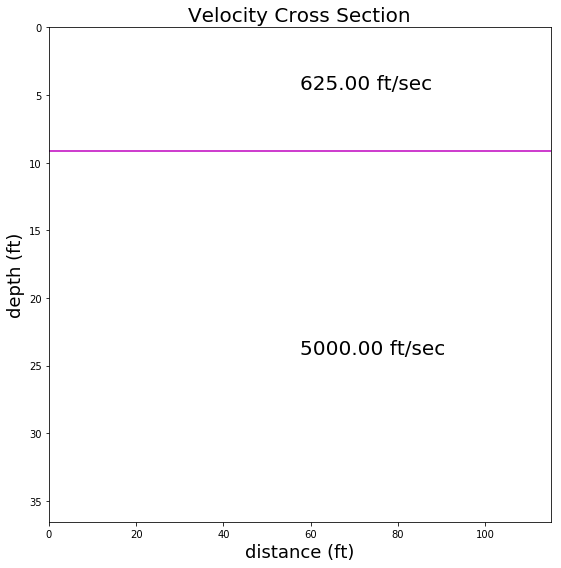

In [324]:
# Find average upper velocity
V0=(1/p1[0] + 1/p2[0])/2;
V0a=1/p1[0];
V0b=1/p2[0];
T0a=t01[0];
T0b=t02[0];
V1a=1/p1[1];
V1b=1/p2[1];
T1a=t01[1];
T1b=t02[1];

i1=0.5*(np.arcsin(V0/V1a)+np.arcsin(V0/V1b));
o1=0.5*(np.arcsin(V0/V1b)-np.arcsin(V0/V1a));

V1=V0/np.sin(i1);

z1a=V0*T1a/(2*np.cos(i1));
z1b=V0*T1b/(2*np.cos(i1));

h1a=z1a/np.cos(o1);
h1b=z1b/np.cos(o1);

#add Next Layer for a 3-layer velocity model
if(numline == 3):

    V2a=1/p1[2];
    V2b=1/p2[2];
    T2a=t01[2];
    T2b=t02[2];

    b21=asin(V0/V2a)+o1;
    a21=asin(V0/V2b)-o1;
    g21=asin(V1/V0*np.sin(a21));
    d21=asin(V1/V0*np.sin(b21));
    i2=(g21+d21)/2;
    o2=(g21-d21)/2 - o1;
    V2=V1/np.sin(i2);

    z2a=V1*(T2a-z1a/V0*(np.cos(a21+b21)+1)/np.cos(a21))/2/np.cos(i2);
    z2b=V1*(T2b-z1b/V0*(np.cos(a21+b21)+1)/np.cos(b21))/2/np.cos(i2);

    h2a=1/np.cos(o2)*(z1a*np.cos(a21-o2+o1)/np.cos(a21)+z2a);
    h2b=1/np.cos(o2)*(z1b*np.cos(b21+o2-o1)/np.cos(b21)+z2b);
    
fig,ax = plt.subplots(1,1,figsize=(8,8))

# Add labels
plt.title('Velocity Cross Section',fontsize=20)
plt.xlabel('distance (ft)',fontsize=18)
plt.ylabel('depth (ft)',fontsize=18)
plt.tight_layout()

dx = 5
xx=np.arange(x[0], x[len(x)-1]+dx, dx);
yy=np.linspace(h1a, h1b, len(xx));
plt.plot(xx,yy,'m')
ax.text((x[m-1]-x[1])/2,h1a/2,'%.02f ft/sec' % V0,fontsize=20)
ax.text((x[m-1]-x[1])/2,(h1a+h1b)/2+15,'%.02f ft/sec' % V1,fontsize=20)

if(numline == 3):
    yy=np.linspace(h2a, h2b, len(xx));
    plt.plot(xx,yy,'b')
    ax.text((x[m-1]-x[2])/2,(h2a+h2b)/2+15,'%.02f ft/sec' % V2,fontsize=20)

plt.ylim([max(yy)*4,0])
plt.xlim([0,max(x)])

In [3]:
#Write results to screen
print('V0a = %.0f  T0a = %f  V0b = %.0f  T0b = %f\n' % (V0a,T0a,V0b,T0b))
print('V1a=%.0f  T1a=%f  V1b=%.0f  T1b=%f\n' % (V1a,T1a,V1b,T1b))
if (numline == 3):
    print('V2a=%.0f  T2a=%f  V2b=%.0f  T2b=%f\n' % (V2a,T2a,V2b,T2b))
print('\n\n')
print('Depth(ft)    Depth(ft)     Velocity(ft/sec)\n')
print('   0            0             %.0f\n' % (V0))
print('  %.1f         %.1f            %.0f\n' % (h1a, h1b, V1))
if(numline == 3):
    print('  %.1f         %.1f          %.0f\n' % (h2a, h2b, V2))

NameError: name 'V0a' is not defined

#### Answer

#### Question 5
Provide an interpretation of your results in terms of the types of materials, the geometry of the subsurface layers, and any deviation from the assumed plane-dipping model (straight line fit to the observations).

#### Answer